## nvm this kinda works maybe

In [1]:
import pandas as pd
from statsmodels.tsa import arima_model
import matplotlib.pyplot as plt

D:\Justin\anapy\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
df = pd.read_csv(r'../../data/cases/CA_JHU_cases.csv')
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,California.JHU_ConfirmedCases.data,California.JHU_ConfirmedCases.missing,California.JHU_ConfirmedDeaths.data,California.JHU_ConfirmedDeaths.missing,California.JHU_ConfirmedRecoveries.data,California.JHU_ConfirmedRecoveries.missing
0,2020-01-01,0.0,5700.0,0.0,5700.0,0.0,11500.0
1,2020-01-02,0.0,5700.0,0.0,5700.0,0.0,11500.0
2,2020-01-03,0.0,5700.0,0.0,5700.0,0.0,11500.0
3,2020-01-04,0.0,5700.0,0.0,5700.0,0.0,11500.0
4,2020-01-05,0.0,5700.0,0.0,5700.0,0.0,11500.0


In [3]:
cases = df[['date', 'California.JHU_ConfirmedCases.data']]
cases.head()

,date,California.JHU_ConfirmedCases.data
0,2020-01-01,0.0
1,2020-01-02,0.0
2,2020-01-03,0.0
3,2020-01-04,0.0
4,2020-01-05,0.0


## Try an ARIMA Model

In [4]:
arima = arima_model.ARIMA(cases['California.JHU_ConfirmedCases.data'], order=(0,0,1))
arima_fit = arima.fit(disp=0)
arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      ARMA Model Results                                      
==============================================================================================
Dep. Variable:     California.JHU_ConfirmedCases.data   No. Observations:                  302
Model:                                     ARMA(0, 1)   Log Likelihood               -4274.197
Method:                                       css-mle   S.D. of innovations         335905.744
Date:                                Fri, 30 Oct 2020   AIC                           8554.394
Time:                                        22:54:25   BIC                           8565.525
Sample:                                             0   HQIC                          8558.848
                                                                                              
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                     5.882e+05   3.86e+04     15.240      0.000    5.13e+05    6.64e+05
ma.L1.California.JHU_ConfirmedCases.data     1.0000      0.012     81.944      0.000       0.976       1.024
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0000           +0.0000j            1.0000            0.5000
-----------------------------------------------------------------------------
"""

In [5]:
rst = arima.fit(disp=-1)

In [6]:
rst.fittedvalues

0      5.881750e+05
1      2.940875e+05
2      3.921167e+05
3      2.940875e+05
4      3.529050e+05
           ...     
297    1.253930e+06
298    1.181806e+06
299    1.257155e+06
300    1.191718e+06
301    1.263993e+06
Length: 302, dtype: float64

D:\Justin\anapy\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: FutureWarning: RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead
  stop = base_index._start + (key + 1) * base_index._step
D:\Justin\anapy\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: FutureWarning: RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead
  stop = base_index._start + (key + 1) * base_index._step
D:\Justin\anapy\lib\site-packages\statsmodels\tsa\base\tsa_model.py:294: FutureWarning: RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead
  index = RangeIndex(start=base_index._start,
D:\Justin\anapy\lib\site-packages\statsmodels\tsa\base\tsa_model.py:296: FutureWarning: RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead
  step=base_index._step)
D:\Justin\anapy\lib\site-packages\scipy\signal\signaltool

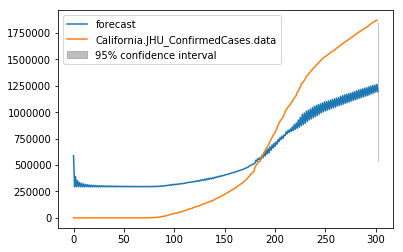

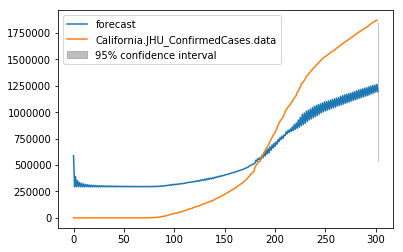

In [7]:
rst.plot_predict(0,len(cases))

## Test inclusion of exogenous variables

In [8]:
labor = pd.read_csv(r'../../data/demographics/CA_State_labor.csv')
labor.head()

,year,month,state,laborForce,employedPopulation,unemployedPopulation,unemploymentRate
0,2020,1,California,38954708,37274734,1679974,23.187685
1,2020,2,California,39056970,37372248,1684722,23.183036
2,2020,3,California,38384234,36171422,2212812,17.346360
3,2020,4,California,37034830,31050892,5983938,6.189040
4,2020,5,California,23131049,19211546,3919503,5.901526


In [9]:
df['month'] = df['date'].apply(lambda x: int(x.month))
df.head()

,date,California.JHU_ConfirmedCases.data,California.JHU_ConfirmedCases.missing,California.JHU_ConfirmedDeaths.data,California.JHU_ConfirmedDeaths.missing,California.JHU_ConfirmedRecoveries.data,California.JHU_ConfirmedRecoveries.missing,month
0,2020-01-01,0.0,5700.0,0.0,5700.0,0.0,11500.0,1
1,2020-01-02,0.0,5700.0,0.0,5700.0,0.0,11500.0,1
2,2020-01-03,0.0,5700.0,0.0,5700.0,0.0,11500.0,1
3,2020-01-04,0.0,5700.0,0.0,5700.0,0.0,11500.0,1
4,2020-01-05,0.0,5700.0,0.0,5700.0,0.0,11500.0,1


In [10]:
exo_test = df[['date', 'month','California.JHU_ConfirmedCases.data']].merge(labor[['month','unemploymentRate']], on=['month'])
exo_test.head()

,date,month,California.JHU_ConfirmedCases.data,unemploymentRate
0,2020-01-01,1,0.0,23.187685
1,2020-01-02,1,0.0,23.187685
2,2020-01-03,1,0.0,23.187685
3,2020-01-04,1,0.0,23.187685
4,2020-01-05,1,0.0,23.187685


In [11]:
arimax = arima_model.ARIMA(exo_test['California.JHU_ConfirmedCases.data'], 
                           order=(0,0,1), exog=exo_test['unemploymentRate'])
arimax_fit = arimax.fit(disp=0)
arimax_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      ARMA Model Results                                      
==============================================================================================
Dep. Variable:     California.JHU_ConfirmedCases.data   No. Observations:                  244
Model:                                     ARMA(0, 1)   Log Likelihood               -3331.565
Method:                                       css-mle   S.D. of innovations         204683.998
Date:                                Fri, 30 Oct 2020   AIC                           6671.130
Time:                                        22:54:27   BIC                           6685.119
Sample:                                             0   HQIC                          6676.764
                                                                                              
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                     6.813e+05   5.02e+04     13.566      0.000    5.83e+05     7.8e+05
unemploymentRate                         -2.774e+04   3512.505     -7.898      0.000   -3.46e+04   -2.09e+04
ma.L1.California.JHU_ConfirmedCases.data     0.9700      0.013     74.259      0.000       0.944       0.996
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0310           +0.0000j            1.0310            0.5000
-----------------------------------------------------------------------------
"""

In [12]:
rst2 = arimax.fit(disp=-1)
rst2.fittedvalues

0       38023.351878
1       19020.505149
2       25352.825953
3       19029.317976
4       22821.073839
           ...      
239    946135.065887
240    908586.656427
241    956051.930268
242    919357.418862
243    962753.736291
Length: 244, dtype: float64

D:\Justin\anapy\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


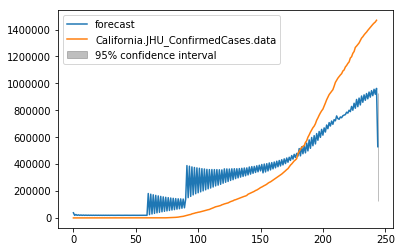

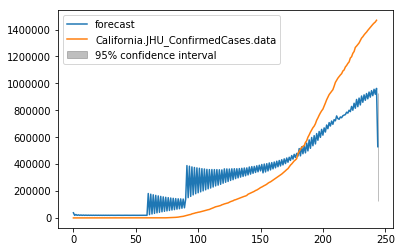

In [13]:
rst2.plot_predict(0,len(exo_test), exog=exo_test['unemploymentRate'])